In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 7.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=628c8fb4ed1f5557b8393495d1778379cc31f2d01633783e5ff3a7cc2db4255f
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
from sklearn.svm import SVR
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime


In [ ]:
import yfinance as yf

In [ ]:
ticker = 'SPY'
SPYData = yf.Ticker(ticker)

In [ ]:
amzn_df = SPYData.history(period='1d', start= '2011-1-1', end = '2021-5-18')

In [ ]:
amzn_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-01-03,103.164156,103.888772,102.341837,103.440979,138725200,0.0,0
2011-01-04,103.668909,103.701477,102.740750,103.383949,137409700,0.0,0
2011-01-05,103.058309,103.986469,102.960606,103.921333,133975300,0.0,0
2011-01-06,103.962036,104.076020,103.408397,103.717781,122519000,0.0,0
2011-01-07,103.856189,104.027165,102.708205,103.514236,156034600,0.0,0
...,...,...,...,...,...,...,...
2021-05-11,411.752918,413.915824,408.722822,412.859283,116888000,0.0,0
2021-05-12,409.889042,411.244592,402.682607,404.088013,134811000,0.0,0
2021-05-13,405.742584,411.005365,405.692729,408.942108,106394000,0.0,0


In [ ]:
for col in amzn_df.columns:
  print (col)

Open
High
Low
Close
Volume
Dividends
Stock Splits


In [ ]:
amzn_df.reset_index(inplace=True)
amzn_df.set_index('Date', inplace=True)

In [ ]:
amzn_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-01-03,103.164156,103.888772,102.341837,103.440979,138725200,0.0,0
2011-01-04,103.668909,103.701477,102.740750,103.383949,137409700,0.0,0
2011-01-05,103.058309,103.986469,102.960606,103.921333,133975300,0.0,0
2011-01-06,103.962036,104.076020,103.408397,103.717781,122519000,0.0,0
2011-01-07,103.856189,104.027165,102.708205,103.514236,156034600,0.0,0
...,...,...,...,...,...,...,...
2021-05-11,411.752918,413.915824,408.722822,412.859283,116888000,0.0,0
2021-05-12,409.889042,411.244592,402.682607,404.088013,134811000,0.0,0
2021-05-13,405.742584,411.005365,405.692729,408.942108,106394000,0.0,0


In [ ]:
df_Open=amzn_df[['Open']]
df_dates=amzn_df.index.to_frame().reset_index(drop=True)
print(df_dates)

           Date
0    2011-01-03
1    2011-01-04
2    2011-01-05
3    2011-01-06
4    2011-01-07
...         ...
2605 2021-05-11
2606 2021-05-12
2607 2021-05-13
2608 2021-05-14
2609 2021-05-17

[2610 rows x 1 columns]


In [ ]:
#amzn_df = pd.concat([amzn_df, df_dates])

In [ ]:
amzn_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-01-03,103.164156,103.888772,102.341837,103.440979,138725200,0.0,0
2011-01-04,103.668909,103.701477,102.740750,103.383949,137409700,0.0,0
2011-01-05,103.058309,103.986469,102.960606,103.921333,133975300,0.0,0
2011-01-06,103.962036,104.076020,103.408397,103.717781,122519000,0.0,0
2011-01-07,103.856189,104.027165,102.708205,103.514236,156034600,0.0,0
...,...,...,...,...,...,...,...
2021-05-11,411.752918,413.915824,408.722822,412.859283,116888000,0.0,0
2021-05-12,409.889042,411.244592,402.682607,404.088013,134811000,0.0,0
2021-05-13,405.742584,411.005365,405.692729,408.942108,106394000,0.0,0


In [ ]:
 #df_dates['Date']

In [ ]:
#a#mzn_df=amzn_df.append(df_dates)

In [ ]:
amzn_df['Date']= df_dates['Date'].values

In [ ]:
amzn_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2011-01-03,103.164156,103.888772,102.341837,103.440979,138725200,0.0,0,2011-01-03
2011-01-04,103.668909,103.701477,102.740750,103.383949,137409700,0.0,0,2011-01-04
2011-01-05,103.058309,103.986469,102.960606,103.921333,133975300,0.0,0,2011-01-05
2011-01-06,103.962036,104.076020,103.408397,103.717781,122519000,0.0,0,2011-01-06
2011-01-07,103.856189,104.027165,102.708205,103.514236,156034600,0.0,0,2011-01-07
...,...,...,...,...,...,...,...,...
2021-05-11,411.752918,413.915824,408.722822,412.859283,116888000,0.0,0,2021-05-11
2021-05-12,409.889042,411.244592,402.682607,404.088013,134811000,0.0,0,2021-05-12
2021-05-13,405.742584,411.005365,405.692729,408.942108,106394000,0.0,0,2021-05-13


In [ ]:
amzn_df['Date'] = amzn_df['Date'].astype(str)

In [ ]:
amzn_df['new_date'] = amzn_df['Date'].str.replace('\D', '').astype(int)

In [ ]:
amzn_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,new_date
Date,,,,,,,,,
2011-01-03,103.164156,103.888772,102.341837,103.440979,138725200,0.0,0,2011-01-03,20110103
2011-01-04,103.668909,103.701477,102.740750,103.383949,137409700,0.0,0,2011-01-04,20110104
2011-01-05,103.058309,103.986469,102.960606,103.921333,133975300,0.0,0,2011-01-05,20110105
2011-01-06,103.962036,104.076020,103.408397,103.717781,122519000,0.0,0,2011-01-06,20110106
2011-01-07,103.856189,104.027165,102.708205,103.514236,156034600,0.0,0,2011-01-07,20110107
...,...,...,...,...,...,...,...,...,...
2021-05-11,411.752918,413.915824,408.722822,412.859283,116888000,0.0,0,2021-05-11,20210511
2021-05-12,409.889042,411.244592,402.682607,404.088013,134811000,0.0,0,2021-05-12,20210512
2021-05-13,405.742584,411.005365,405.692729,408.942108,106394000,0.0,0,2021-05-13,20210513


In [ ]:
actual_price = amzn_df.tail(1)
actual_price

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,new_date
Date,,,,,,,,,
2021-05-17,414.035458,415.032197,412.012048,414.165009,65129200,0.0,0,2021-05-17,20210517


In [ ]:
x=actual_price['Close']
list2=[]
list2.append(x)
list2

y= 1+ list2[0]
print(list2[0])
print(y)

len(list2)


Date
2021-05-17    414.165009
Name: Close, dtype: float64
Date
2021-05-17    415.165009
Name: Close, dtype: float64


1

In [ ]:
amzn_df = amzn_df.head(len(amzn_df)-1)

In [ ]:
days = list()
close_prices= list()

In [ ]:
df_days = amzn_df.loc[:,'new_date']
df_days

Date
2011-01-03    20110103
2011-01-04    20110104
2011-01-05    20110105
2011-01-06    20110106
2011-01-07    20110107
                ...   
2021-05-10    20210510
2021-05-11    20210511
2021-05-12    20210512
2021-05-13    20210513
2021-05-14    20210514
Name: new_date, Length: 2609, dtype: int64

In [ ]:
df_close_price = amzn_df.loc[:,'Close']

In [ ]:
for dates in df_days:
  days.append([int(dates)])

days

[[20110103],
 [20110104],
 [20110105],
 [20110106],
 [20110107],
 [20110110],
 [20110111],
 [20110112],
 [20110113],
 [20110114],
 [20110118],
 [20110119],
 [20110120],
 [20110121],
 [20110124],
 [20110125],
 [20110126],
 [20110127],
 [20110128],
 [20110131],
 [20110201],
 [20110202],
 [20110203],
 [20110204],
 [20110207],
 [20110208],
 [20110209],
 [20110210],
 [20110211],
 [20110214],
 [20110215],
 [20110216],
 [20110217],
 [20110218],
 [20110222],
 [20110223],
 [20110224],
 [20110225],
 [20110228],
 [20110301],
 [20110302],
 [20110303],
 [20110304],
 [20110307],
 [20110308],
 [20110309],
 [20110310],
 [20110311],
 [20110314],
 [20110315],
 [20110316],
 [20110317],
 [20110318],
 [20110321],
 [20110322],
 [20110323],
 [20110324],
 [20110325],
 [20110328],
 [20110329],
 [20110330],
 [20110331],
 [20110401],
 [20110404],
 [20110405],
 [20110406],
 [20110407],
 [20110408],
 [20110411],
 [20110412],
 [20110413],
 [20110414],
 [20110415],
 [20110418],
 [20110419],
 [20110420],
 [20110421],

In [ ]:
for price in df_close_price: 
  close_prices.append(float(price))

close_prices

[103.44097900390625,
 103.38394927978516,
 103.92133331298828,
 103.71778106689453,
 103.51423645019531,
 103.38394927978516,
 103.75032043457031,
 104.68666076660156,
 104.5156478881836,
 105.27286529541016,
 105.45196533203125,
 104.41796875,
 104.27954864501953,
 104.5156478881836,
 105.11003112792969,
 105.16699981689453,
 105.57408905029297,
 105.83463287353516,
 103.98644256591797,
 104.7680435180664,
 106.44525146484375,
 106.2417221069336,
 106.47785186767578,
 106.77906799316406,
 107.44669342041016,
 107.93523406982422,
 107.69097900390625,
 107.73169708251953,
 108.37486267089844,
 108.63539123535156,
 108.29344940185547,
 108.97734832763672,
 109.30304718017578,
 109.53097534179688,
 107.3327407836914,
 106.67327117919922,
 106.59996795654297,
 107.73980712890625,
 108.40740203857422,
 106.59996795654297,
 106.82791137695312,
 108.66796112060547,
 107.85376739501953,
 107.00706481933594,
 107.94335174560547,
 107.78865051269531,
 105.7939224243164,
 106.52667236328125,
 105

In [ ]:
print(days)
print(close_prices)

print(len(days))
print(len(close_prices))

[[20110103], [20110104], [20110105], [20110106], [20110107], [20110110], [20110111], [20110112], [20110113], [20110114], [20110118], [20110119], [20110120], [20110121], [20110124], [20110125], [20110126], [20110127], [20110128], [20110131], [20110201], [20110202], [20110203], [20110204], [20110207], [20110208], [20110209], [20110210], [20110211], [20110214], [20110215], [20110216], [20110217], [20110218], [20110222], [20110223], [20110224], [20110225], [20110228], [20110301], [20110302], [20110303], [20110304], [20110307], [20110308], [20110309], [20110310], [20110311], [20110314], [20110315], [20110316], [20110317], [20110318], [20110321], [20110322], [20110323], [20110324], [20110325], [20110328], [20110329], [20110330], [20110331], [20110401], [20110404], [20110405], [20110406], [20110407], [20110408], [20110411], [20110412], [20110413], [20110414], [20110415], [20110418], [20110419], [20110420], [20110421], [20110425], [20110426], [20110427], [20110428], [20110429], [20110502], [20

In [ ]:
rbf = SVR(kernel= 'rbf', C= 1000.0, gamma= 1E-5)
rbf.fit(days, close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

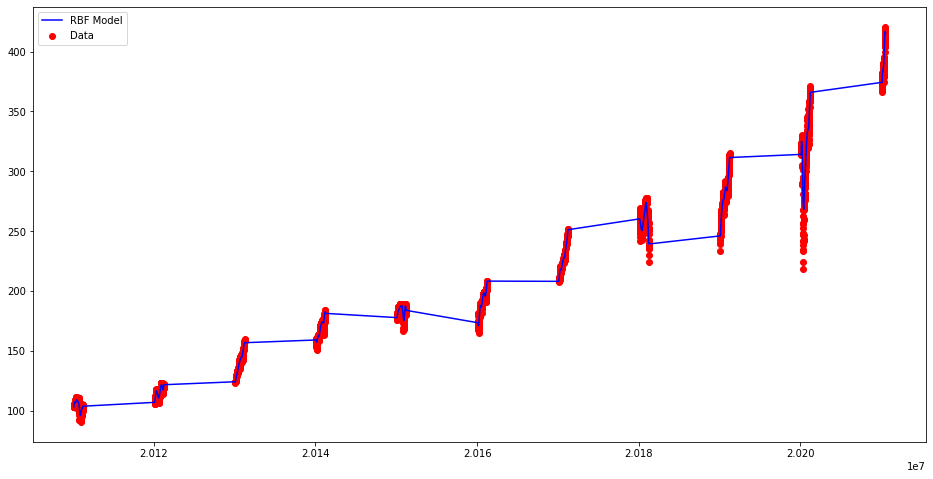

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(days,close_prices, color= 'red', label= 'Data')
plt.plot(days, rbf.predict(days), color='blue', label='RBF Model')
plt.legend()
plt.show()

In [ ]:
actual_price

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,new_date
Date,,,,,,,,,
2021-05-17,414.035458,415.032197,412.012048,414.165009,65129200,0.0,0,2021-05-17,20210517


In [ ]:
day= [[20210517]]
print('The predicted value on 2021-05-04 from the rbf model is: ' , rbf.predict(day))
print('The percent error for this is: ', float((abs(3270.39-(rbf.predict(day)))/3270.39)*100),'%')

The predicted value on 2021-05-04 from the rbf model is:  [414.46568491]
The percent error for this is:  87.32671990452123 %


In [ ]:
may_sixth = [[20210505]]
print('The predicted value on 2021-05-05 from the rbf model is: ' , rbf.predict(may_sixth))
print('The percent error for this is: ', float((abs(3270.54-(rbf.predict(may_sixth)))/3270.54)*100),'%')

The predicted value on 2021-05-05 from the rbf model is:  [416.65147215]
The percent error for this is:  87.26046854174069 %


In [ ]:
tomorrow = [[20210506]]
print('The predicted value on 2021-05-06 from the rbf model is: ' , rbf.predict(tomorrow))
print('It\'s predicted to drop: ' , float(((3146.3458-3249.386427)/3146.3458)*100), '%')

The predicted value on 2021-05-06 from the rbf model is:  [416.50059488]
It's predicted to drop:  -3.2749301427706974 %


# RBF Unfixed

In [ ]:
rbf = SVR(kernel= 'rbf', C= 1000.0, gamma= 0.15)
rbf.fit(days, close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

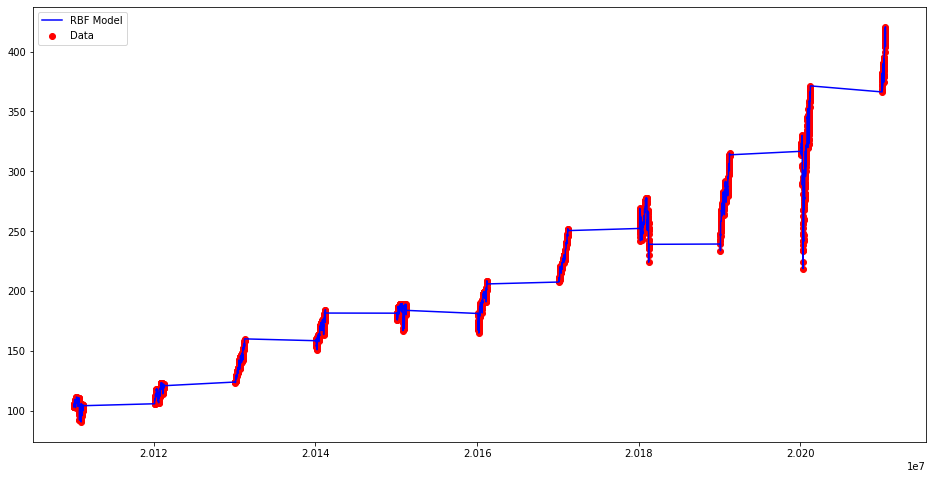

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(days,close_prices, color= 'red', label= 'Data')
plt.plot(days, rbf.predict(days), color='blue', label='RBF Model')
plt.legend()
plt.show()

In [ ]:
day= [[20210517]]
print('The predicted value on 2021-05-04 from the rbf model is: ' , rbf.predict(day))
print('The percent error for this is: ', float((abs(3270.39-(rbf.predict(day)))/3270.39)*100),'%')

The predicted value on 2021-05-04 from the rbf model is:  [263.5083257]
The percent error for this is:  91.94260238997862 %


In [ ]:
may_sixth = [[20210505]]
print('The predicted value on 2021-05-05 from the rbf model is: ' , rbf.predict(may_sixth))
print('The percent error for this is: ', float((abs(3270.54-(rbf.predict(may_sixth)))/3270.54)*100),'%')

The predicted value on 2021-05-05 from the rbf model is:  [413.60177652]
The percent error for this is:  87.35371600652095 %


# Linear

In [ ]:
lin = SVR(kernel= 'linear',C= 1E-8)
lin.fit(days, close_prices) 

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(days,close_prices, color= 'red', label= 'Data')
plt.plot(days, lin.predict(days), color='blue', label='Linear Model')
plt.legend()
plt.show()

In [ ]:
day= [[20210517]]
print('The predicted value on 2021-05-04 from the rbf model is: ' ,lin.predict(day))
print('The percent error for this is: ', float((abs(3270.39-(lin.predict(day)))/3270.39)*100),'%')

# 05-02-2020 - Now 

In [ ]:
spy_df2 = SPYData.history(period='1d', start= '2020-5-2', end = '2021-5-18')

In [ ]:
spy_df2


In [ ]:
df_Open=spy_df2[['Open']]
df_dates2=spy_df2.index.to_frame().reset_index(drop=True)
print(df_dates2)

In [ ]:
spy_df2['Date']= df_dates2['Date'].values

In [ ]:
spy_df2

In [ ]:
spy_df2['Date'] = spy_df2['Date'].astype(str)

In [ ]:
spy_df2['new_date'] = spy_df2['Date'].str.replace('\D', '').astype(int)

In [ ]:
actual_price2 = spy_df2.tail(1)
actual_price2

In [ ]:
spy_df2 = spy_df2.head(len(spy_df2)-1)

In [ ]:
days2 = list()
close_prices2= list()

In [ ]:
df_days2 = spy_df2.loc[:,'new_date']
df_days2

In [ ]:
df_close_price2 = spy_df2.loc[:,'Close']

In [ ]:
for dates2 in df_days2:
  days2.append([int(dates2)])

days2

In [ ]:
for price2 in df_close_price2: 
  close_prices2.append(float(price2))

close_prices2

In [ ]:
print(days2)
print(close_prices2)

print(len(days2))
print(len(close_prices2))

In [ ]:
rbf = SVR(kernel= 'rbf', C= 1000.0, gamma= 0.1)
rbf.fit(days2, close_prices2)

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(days2,close_prices2, color= 'red', label= 'Data')
plt.plot(days2, rbf.predict(days2), color='blue', label='RBF Model')
plt.legend()
plt.show()

In [ ]:
day= [[20210517]]
print('The predicted value on 2021-05-04 from the rbf model is: ' , rbf.predict(day))
print('The percent error for this is: ', float((abs(415.52-(rbf.predict(day)))/415.52)*100),'%')

In [ ]:
#Today
may_sixth = [[20210505]]
print('The predicted value on 2021-05-05 from the rbf model is: ' , rbf.predict(may_sixth))
print('The percent error for this is: ', float((abs(3270.54-(rbf.predict(may_sixth)))/3270.54)*100),'%')

In [ ]:
#Tomorrow
tomorrow = [[20210518]]
print('The predicted value on 2021-05-06 from the rbf model is: ' , rbf.predict(tomorrow))
#print('It\'s predicted to drop: ' , float(((3161.45796-3249.386427)/3249.386427)*100), '%')

In [ ]:
twoDays = [[20210507]]
print('The predicted value on 2021-05-07 from the rbf model is: ' , rbf.predict(twoDays))